Лабораторная работа №6
Выберите метод:
1) Явная конечно-разностная схема
2) Неявная конечно-разностная схема
0) Выход
1


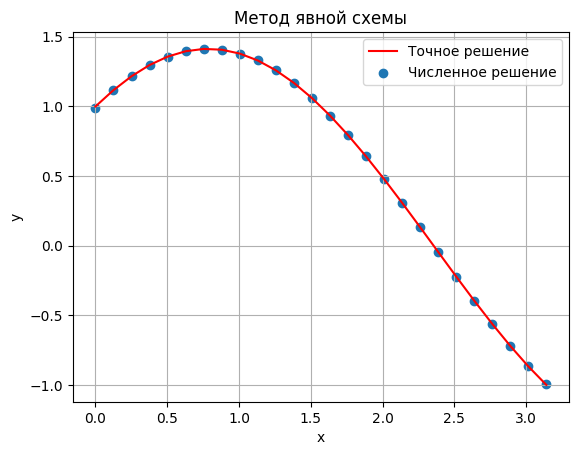

0.12566370614359174 0.06283185307179587 0.031415926535897934


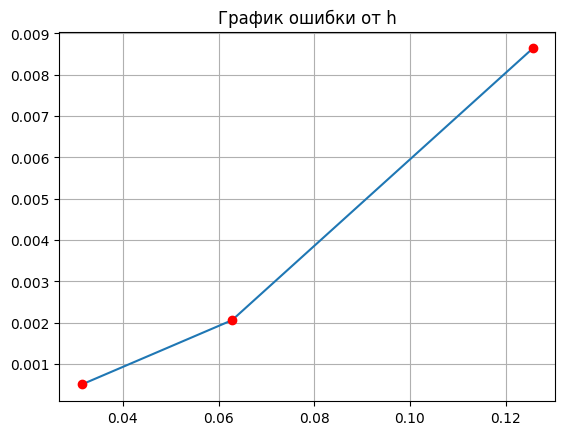

Выберите метод:
1) Явная конечно-разностная схема
2) Неявная конечно-разностная схема
0) Выход
2


<ipython-input-1-169110a42d29>:61: RuntimeWarning: overflow encountered in scalar multiply
  d[j] = 1/tau * U[k, j]


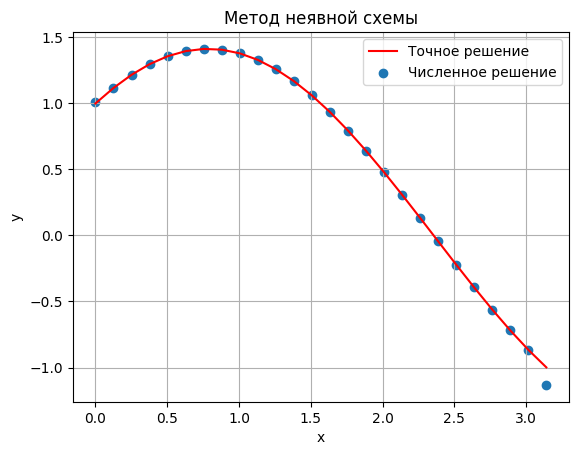

0.12566370614359174 0.06283185307179587 0.031415926535897934


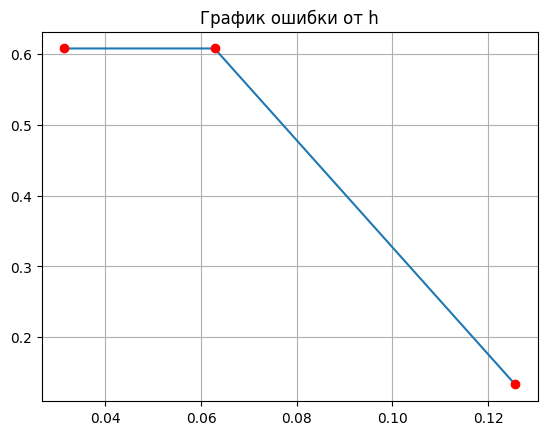

Выберите метод:
1) Явная конечно-разностная схема
2) Неявная конечно-разностная схема
0) Выход
0


0

In [ ]:
import numpy as np, matplotlib.pyplot as plt
def analyt_func(x, t, a):
    return np.sin(x - a * t) + np.cos(x + a * t)
def fi1(t):
    return 0
def fi2(t):
    return 0
def psi1(x):
    return np.sin(x) + np.cos(x)
def psi2(x, a):
    return -a *(np.sin(x) + np.cos(x))
def run_through(a, b, c, d, s):
    P = np.zeros(s + 1)
    Q = np.zeros(s + 1)
    P[0] = -c[0] / b[0]
    Q[0] = d[0] / b[0]
    k = s - 1
    for i in range(1, s):
        P[i] = -c[i] / (b[i] + a[i] * P[i - 1])
        Q[i] = (d[i] - a[i] * Q[i - 1]) / (b[i] + a[i] * P[i - 1])
    P[k] = 0
    Q[k] = (d[k] - a[k] * Q[k - 1]) / (b[k] + a[k] * P[k - 1])
    x = np.zeros(s)
    x[k] = Q[k]
    for i in range(s - 2, -1, -1):
        x[i] = P[i] * x[i + 1] + Q[i]
    return x
def explicit(K, t, tau, h, x, a):
    N = len(x)
    U = np.zeros((K, N))
    t += tau
    sigma = a * tau**2 / h**2
    for j in range(N):
        U[0, j] = psi1(x[j])
        U[1][j] = psi1(x[j]) + psi2(x[j], a) * tau
    for k in range(1, K - 1):
        t += tau
        for j in range(1, N - 1):
            U[k + 1, j] = sigma * U[k, j + 1] + 2 * (1 - sigma) * U[k, j] + sigma * U[k, j - 1] - U[k - 1, j]
        U[k + 1, 0] = 1 / (h + 1) * U[k + 1, 1] + fi1(t) * h
        U[k + 1, N - 1] = U[k + 1, N - 2] / (1 - h)
    return U
def implicit(K, t, tau, h, x, a):
    N = len(x)
    U = np.zeros((K, N))
    t += tau
    sigma = (a**2 * tau **2) / (h **2)
    for j in range(N):
        U[0, j] = psi1(x[j])
        U[1][j] = psi2(x[j], a) * tau + psi1(x[j])
    for k in range(1, K - 1):
        a = np.zeros(N)
        b = np.zeros(N)
        c = np.zeros(N)
        d = np.zeros(N)
        t += tau
        for j in range(1, N - 1):
            a[j] = - 1/ h ** 2
            b[j] = 2/ h ** 2 + 1/ tau
            c[j] = - 1/ h ** 2
            d[j] = 1/tau * U[k, j]
        a[0] = 0
        b[0] = 2/h + h/tau
        c[0] = -2/h
        d[0] = h/tau * U[k, 0] - fi1(t)*2
        a[N - 1] = -2/h
        b[N - 1] = -2 / h + h/tau - 2
        c[N - 1] = 0
        d[N - 1] = h / tau * U[k - 1, N - 1] + fi2(t)
        u_new = run_through(a, b, c, d, N)
        for i in range(N):
            U[k + 1, i] = u_new[i]
    return U
def main(N, K, time):
    a = 1
    h = np.pi / N
    h2 = h / 2
    h3 = h / 4
    tau = time / K
    x = np.arange(0, np.pi + h / 2 - 1e-4, h)
    x2 = np.arange(0, np.pi + h2 / 2 - 1e-4, h2)
    x3 = np.arange(0, np.pi + h3 / 2 - 1e-4, h3)
    T = np.arange(0, time, tau)
    t = 0
    print("Лабораторная работа №6")
    while (1):
        print("Выберите метод:\n"
              "1) Явная конечно-разностная схема\n"
              "2) Неявная конечно-разностная схема\n"
              "0) Выход")
        method = int(input())
        if method == 0:
            break
        else:
            if method == 1:
                dt = 10
                if tau / h ** 2 <= 1:
                    # print("Условие Куррента выполнено:", tau / h ** 2, "<= 1")
                    U = explicit(K, t, tau, h, x, a)
                    U2 = explicit(K, t, tau, h2, x2, a)
                    U3 = explicit(K, t, tau, h3, x3, a)
                    U_analytic = analyt_func(x, T[dt], a)
                    U_analytic2 = analyt_func(x2, T[dt], a)
                    U_analytic3 = analyt_func(x3, T[dt], a)
                    plt.title("Метод явной схемы")
                    plt.plot(x, U_analytic, label="Точное решение", color="red")
                    plt.scatter(x, U[dt, :], label="Численное решение")
                    plt.xlabel("x")
                    plt.ylabel("y")
                    plt.axis()
                    plt.grid()
                    plt.legend()
                    plt.show()

                    error = abs(U_analytic - U[dt, :])
                    er1 = max(error)
                    error2 = abs(U_analytic2 - U2[dt, :])
                    er2 = max(error2)
                    error3 = abs(U_analytic3 - U3[dt, :])
                    er3 = max(error3)
                    print(h, h2, h3)
                    plt.title("График ошибки от h")
                    errors = [er1, er2, er3]
                    x_h = [h, h2, h3]
                    plt.plot(x_h, errors)
                    plt.scatter(x_h, errors, label='', zorder=6, c='r')
                    plt.grid()
                    plt.show()
                else:
                    # print("Условие Куррента не выполнено:", tau / h ** 2, "> 1")
                    break
            elif method == 2:
                dt = 10
                U = implicit(K, t, tau, h, x, a)
                U2 = implicit(K, t, tau, h2, x2, a)
                U3 = implicit(K, t, tau, h3, x3, a)
                U_analytic = analyt_func(x, T[dt], a)
                U_analytic2 = analyt_func(x2, T[dt], a)
                U_analytic3 = analyt_func(x3, T[dt], a)
                plt.title("Метод неявной схемы")
                plt.plot(x, U_analytic, label="Точное решение", color="red")
                plt.scatter(x, U[dt, :], label="Численное решение")
                plt.xlabel("x")
                plt.ylabel("y")
                plt.axis()
                plt.grid()
                plt.legend()
                plt.show()
                error = abs(U_analytic - U[dt, :])
                er1 = max(error)
                error2 = abs(U_analytic2 - U2[dt, :])
                er2 = max(error2)
                error3 = abs(U_analytic3 - U3[dt, :])
                er3 = max(error3)
                print(h, h2, h3)
                plt.title("График ошибки от h")
                errors = [er1, er2, er2]
                x_h = [h, h2, h3]
                plt.plot(x_h, errors)
                plt.scatter(x_h, errors, label='', zorder=6, c='r')
                plt.grid()
                plt.show()
    return 0

N = 25
K = 30000
time = 3
main(N, K, time)
